In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
netflix_data=pd.read_csv('netflix.csv')
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [94]:
netflix_data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [95]:
netflix_data.shape

(8807, 12)

In [96]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [97]:
# categorical columns
categorifal_column=['type','cast','country','rating','listed_in']

for col in categorifal_column:
    netflix_data[col]=netflix_data[col].astype('category')

netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       8807 non-null   object  
 1   type          8807 non-null   category
 2   title         8807 non-null   object  
 3   director      6173 non-null   object  
 4   cast          7982 non-null   category
 5   country       7976 non-null   category
 6   date_added    8797 non-null   object  
 7   release_year  8807 non-null   int64   
 8   rating        8803 non-null   category
 9   duration      8804 non-null   object  
 10  listed_in     8807 non-null   category
 11  description   8807 non-null   object  
dtypes: category(5), int64(1), object(6)
memory usage: 911.7+ KB


In [98]:
# converting date column
netflix_data['date_added']=pd.to_datetime(netflix_data['date_added'],errors='coerce')
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   category      
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   category      
 5   country       7976 non-null   category      
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   category      
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   category      
 11  description   8807 non-null   object        
dtypes: category(5), datetime64[ns](1), int64(1), object(5)
memory usage: 911.7+ KB


In [99]:
# Missing value detection
is_null_data=netflix_data.isnull().sum()
is_null_data.sort_values(ascending=False)


director        2634
country          831
cast             825
date_added        98
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [101]:
# Filling non value for director
netflix_data['director'].fillna('unknown',inplace=True)
netflix_data['director']

0       Kirsten Johnson
1               unknown
2       Julien Leclercq
3               unknown
4               unknown
             ...       
8802      David Fincher
8803            unknown
8804    Ruben Fleischer
8805       Peter Hewitt
8806        Mozez Singh
Name: director, Length: 8807, dtype: object

In [102]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   category      
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          7982 non-null   category      
 5   country       7976 non-null   category      
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   category      
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   category      
 11  description   8807 non-null   object        
dtypes: category(5), datetime64[ns](1), int64(1), object(5)
memory usage: 911.7+ KB


In [103]:
netflix_data['country'].head()

0    United States
1     South Africa
2              NaN
3              NaN
4            India
Name: country, dtype: category
Categories (748, object): [', France, Algeria', ', South Korea', 'Argentina', 'Argentina, Brazil, France, Poland, Germany, D..., ..., 'Venezuela, Colombia', 'Vietnam', 'West Germany', 'Zimbabwe']

In [104]:
netflix_data['country']=(netflix_data['country'].cat.add_categories('Not available')).fillna('Not available')

In [106]:
netflix_data['country'].value_counts()

country
United States                                                                          2818
India                                                                                   972
Not available                                                                           831
United Kingdom                                                                          419
Japan                                                                                   245
                                                                                       ... 
Ireland, Canada, Luxembourg, United States, United Kingdom, Philippines, India            1
Ireland, Canada, United Kingdom, United States                                            1
Ireland, Canada, United States, United Kingdom                                            1
Ireland, France, Iceland, United States, Mexico, Belgium, United Kingdom, Hong Kong       1
Norway, Germany                                                         

In [107]:
netflix_data['cast']=(netflix_data['cast'].cat.add_categories('Not available')).fillna('Not available')
netflix_data['cast'].value_counts()

cast
Not available                                                                                                                                                                                                                                          825
David Attenborough                                                                                                                                                                                                                                      19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                                                                                 14
Samuel West                                                                                                                                                                                                                                       

In [108]:
# statistics
netflix_data.describe()

,date_added,release_year
count,8709,8807.000000
mean,2019-05-23 01:45:29.452290816,2014.180198
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-20 00:00:00,2013.000000
50%,2019-07-12 00:00:00,2017.000000
75%,2020-08-26 00:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.819312


In [109]:
netflix_data.describe(include='category')

,type,cast,country,rating,listed_in
count,8807,8807,8807,8803,8807
unique,2,7693,749,17,514
top,Movie,Not available,United States,TV-MA,"Dramas, International Movies"
freq,6131,825,2818,3207,362


In [111]:
# Non-Graphical Analysis: Value counts and unique attributes
# Value Counts Analysis (Key Columns)
netflix_data['type'].value_counts(ascending=False)
# Business Insight:
# Netflix is movie-heavy, but TV shows drive long-term user engagement.

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Rating Distribution (rating)

In [118]:
netflix_data['rating'].value_counts(ascending=False)

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
UR             3
NC-17          3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

Insight:

Strong focus on mature and teen audiences

Family/kids content is comparatively less

Country-wise Content (country)

In [119]:
netflix_data['country'].value_counts(ascending=False)

country
United States                                                                          2818
India                                                                                   972
Not available                                                                           831
United Kingdom                                                                          419
Japan                                                                                   245
                                                                                       ... 
Ireland, Canada, Luxembourg, United States, United Kingdom, Philippines, India            1
Ireland, Canada, United Kingdom, United States                                            1
Ireland, Canada, United States, United Kingdom                                            1
Ireland, France, Iceland, United States, Mexico, Belgium, United Kingdom, Hong Kong       1
Norway, Germany                                                         

Heavy dependency on US content

India is one of the top international contributors

Opportunity for regional expansion

Release Year (release_year)

In [120]:
netflix_data['release_year'].value_counts(ascending=False)

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64

Generes (listed in)

In [121]:
netflix_data['listed_in'].value_counts(ascending=False).head(5)

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Name: count, dtype: int64

Insight 

Drama dominates across regions

Documentaries are a strong niche growth area



Visual Analysis - Univariate, Bivariate after pre-processing of the data


UNIVARIATE ANALYSIS (Seaborn)

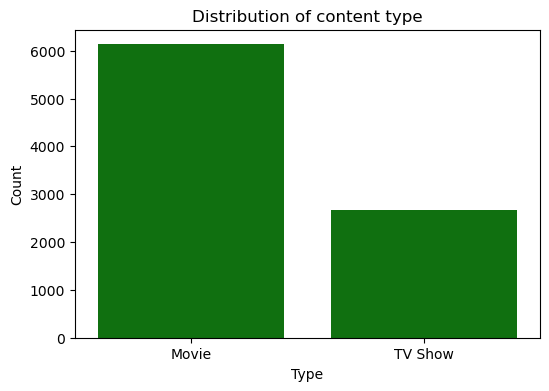

In [ ]:

fig=plt.figure(figsize=(6,4))
sns.countplot(data=netflix_data,x='type',color='green')
plt.title('Distribution of content type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

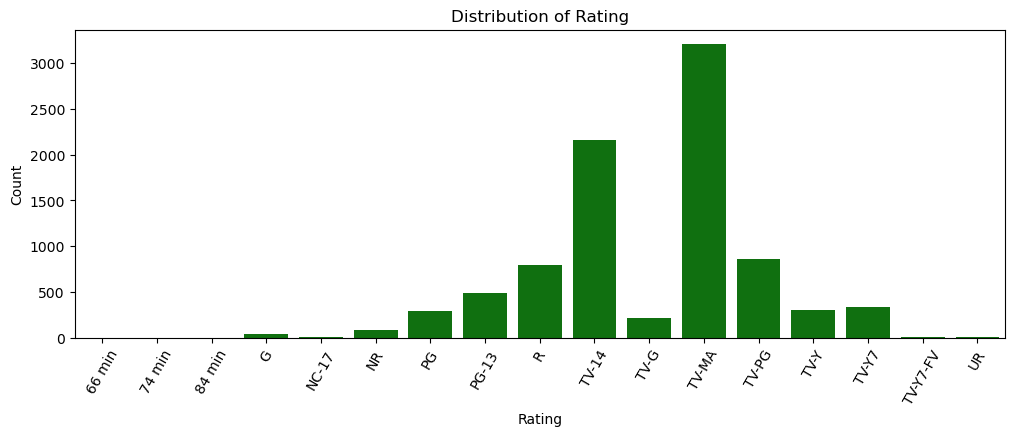

In [138]:
fig=plt.figure(figsize=(12,4))
sns.countplot(data=netflix_data,x='rating',
              color='green')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.xticks(rotation=60)
plt.ylabel('Count')
plt.show()

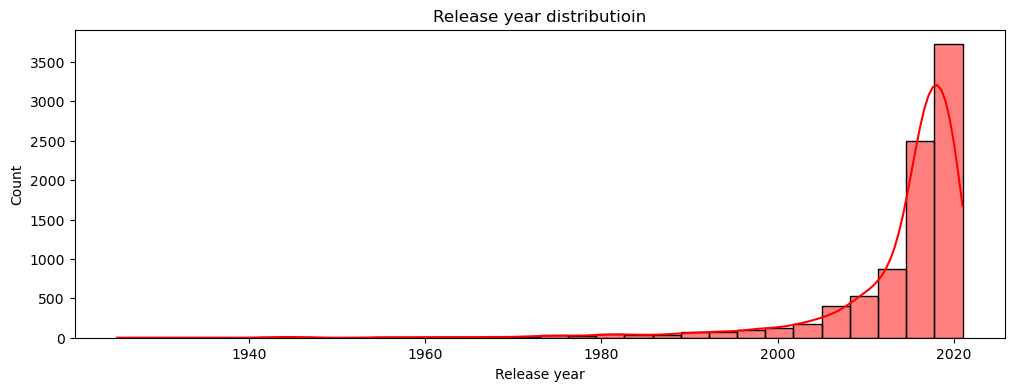

In [142]:
fig=plt.figure(figsize=(12,4))
sns.histplot(data=netflix_data['release_year'],bins=30,kde=True,
              color='red')
plt.title('Release year distributioin')
plt.xlabel('Release year')
plt.show()

Top 10 Genres

In [155]:
top_10_genres=netflix_data['listed_in'].value_counts(ascending=False).head(5)
top_10_genres

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Name: count, dtype: int64

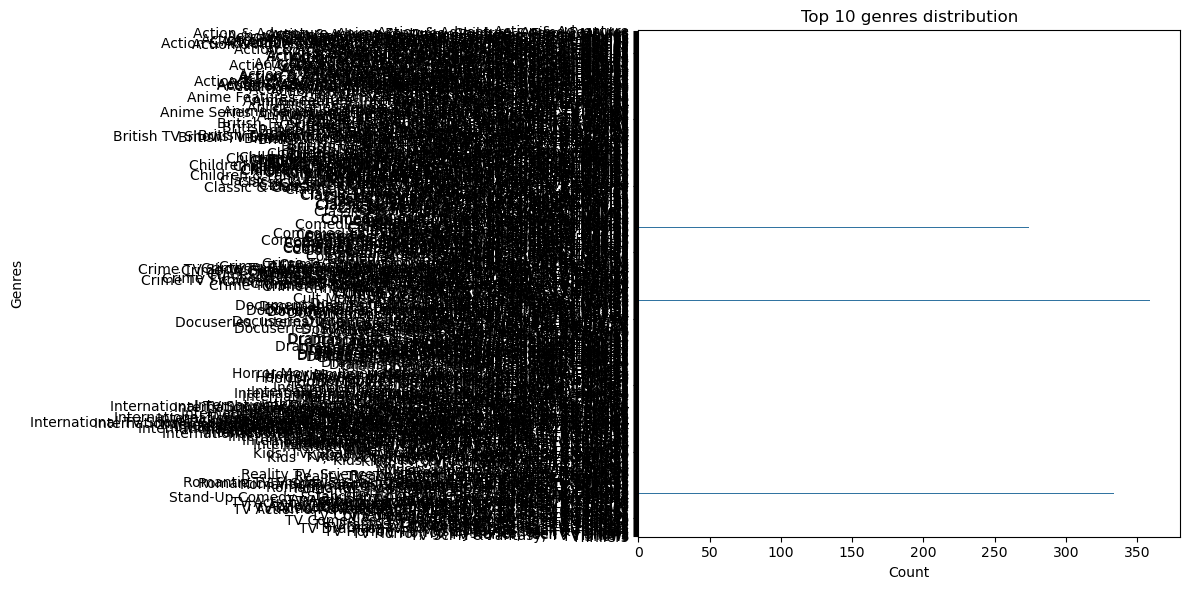

In [159]:
fig=plt.figure(figsize=(12,6))
sns.barplot(x=top_10_genres.values,y=top_10_genres.index)
plt.title('Top 10 genres distribution')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.tight_layout()
plt.show()

BIVARIATE ANALYSIS (Seaborn)

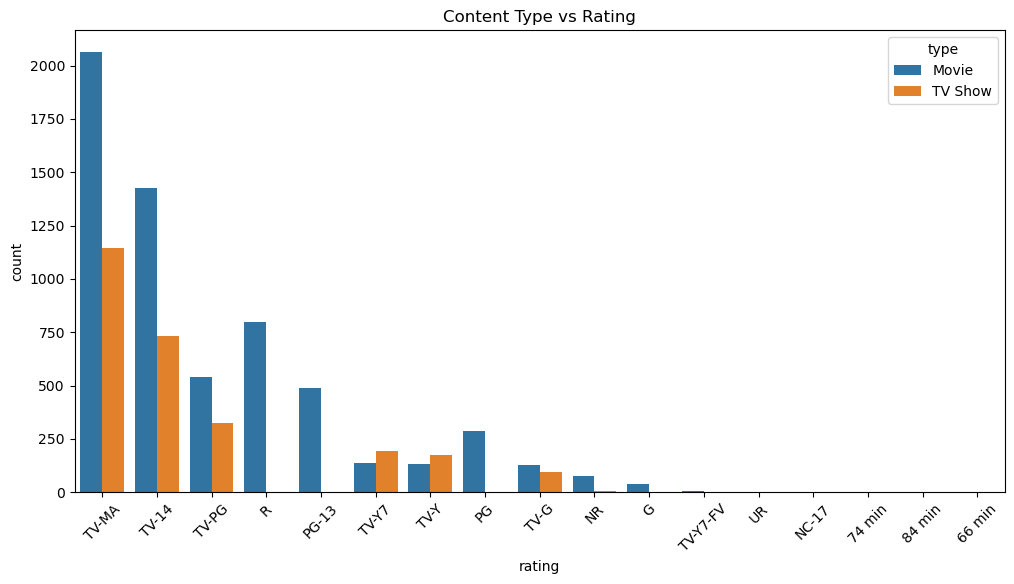

In [160]:
plt.figure(figsize=(12,6))
sns.countplot(data=netflix_data, x='rating', hue='type',
              order=netflix_data['rating'].value_counts().index)
plt.title('Content Type vs Rating')
plt.xticks(rotation=45)
plt.show()

Content Type vs Release Year


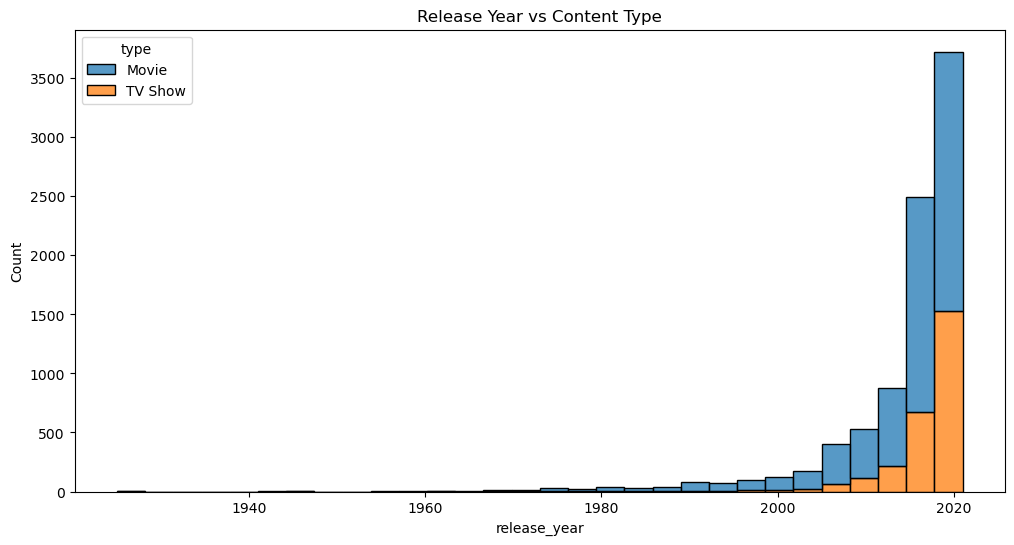

In [161]:
plt.figure(figsize=(12,6))
sns.histplot(data=netflix_data, x='release_year', hue='type',
             multiple='stack', bins=30)
plt.title('Release Year vs Content Type')
plt.show()

Country vs Content Type (Top 5 Countries)

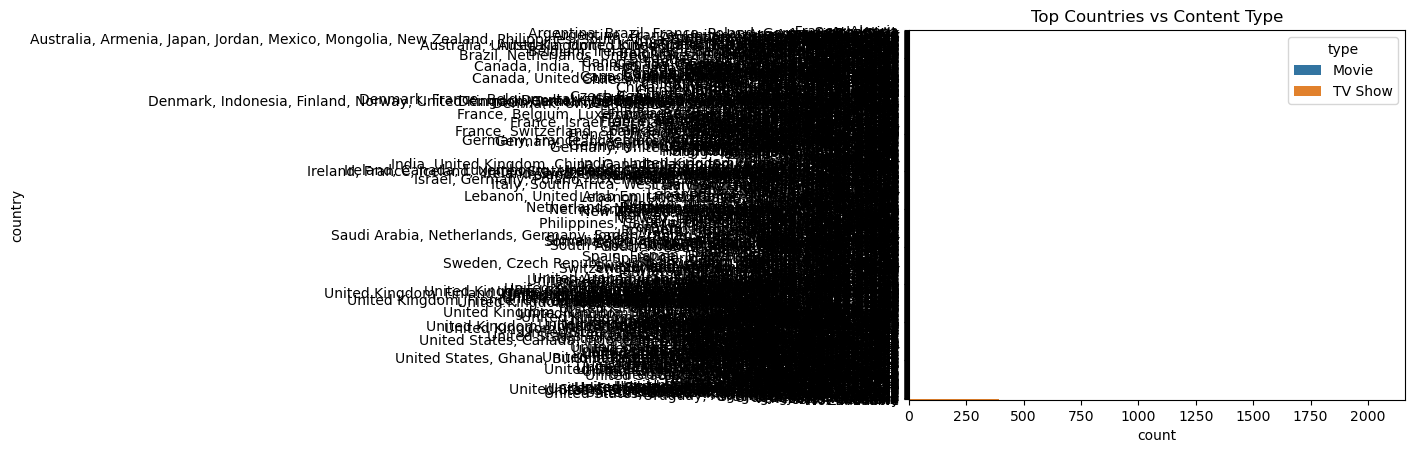

In [162]:
top_countries = netflix_data['country'].value_counts().head(5).index
df_country = netflix_data[netflix_data['country'].isin(top_countries)]

sns.countplot(data=df_country, y='country', hue='type')
plt.title('Top Countries vs Content Type')
plt.show()

Genre vs Rating (Heatmap)

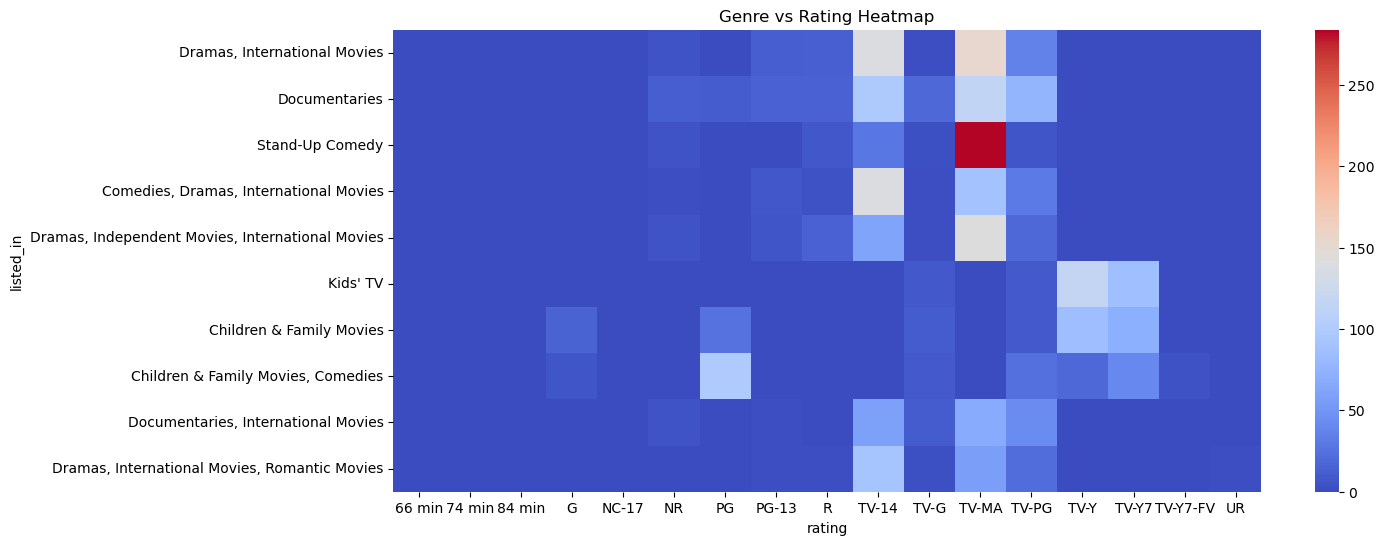

In [163]:
genre_rating = pd.crosstab(netflix_data['listed_in'], netflix_data['rating'])
top_genre_rating = genre_rating.loc[genre_rating.sum(axis=1).sort_values(ascending=False).head(10).index]

plt.figure(figsize=(14,6))
sns.heatmap(top_genre_rating, cmap='coolwarm')
plt.title('Genre vs Rating Heatmap')
plt.show()

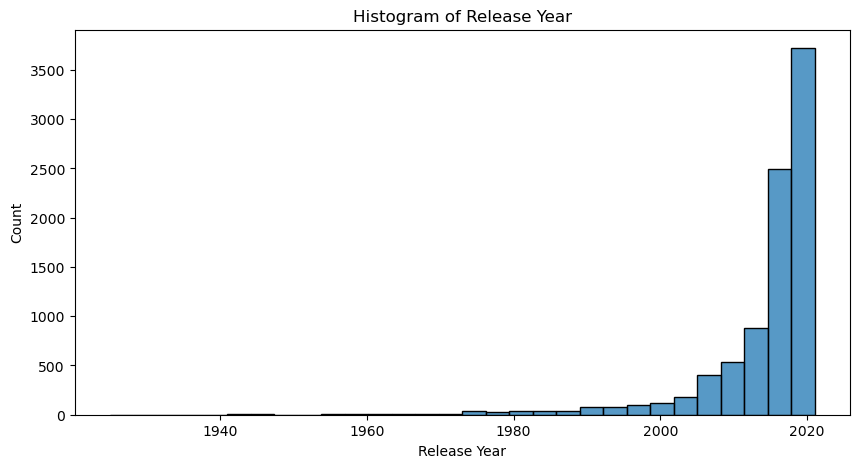

In [164]:
plt.figure(figsize=(10,5))
sns.histplot(netflix_data['release_year'], bins=30, kde=False)
plt.title('Histogram of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

C:\Users\shahn\AppData\Local\Temp\ipykernel_18844\108119181.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(netflix_data['release_year'], bins=30, kde=True)


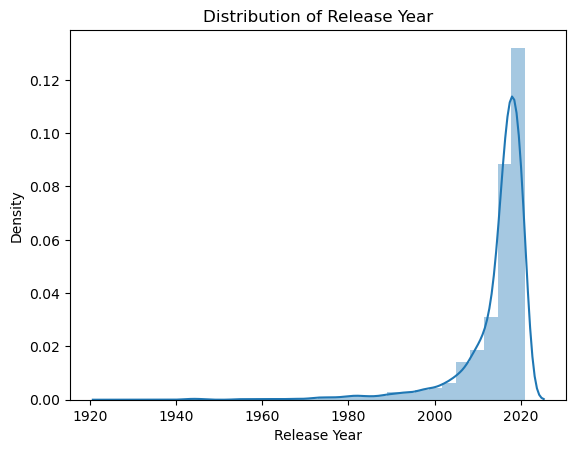

In [165]:
sns.distplot(netflix_data['release_year'], bins=30, kde=True)
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.show()

In [168]:
df_movies = netflix_data[netflix_data['type'] == 'Movie'].copy()
df_movies['duration_minutes'] = (
    df_movies['duration']
    .str.replace(' min', '', regex=False)
    .pipe(pd.to_numeric, errors='coerce')
)
df_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, JosÃ© Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Not available,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91.0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125.0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104.0
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis NiewÃ¶hner, Milan Peschel,...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,96.0
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88.0


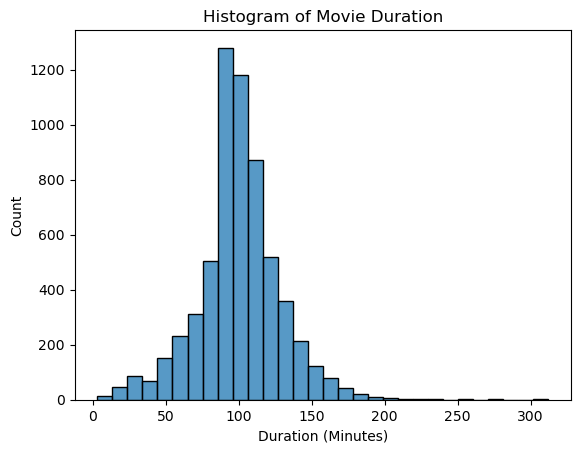

In [169]:
sns.histplot(df_movies['duration_minutes'], bins=30)
plt.title('Histogram of Movie Duration')
plt.xlabel('Duration (Minutes)')
plt.show()

C:\Users\shahn\AppData\Local\Temp\ipykernel_18844\1987534695.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_movies['duration_minutes'], bins=30, kde=True)


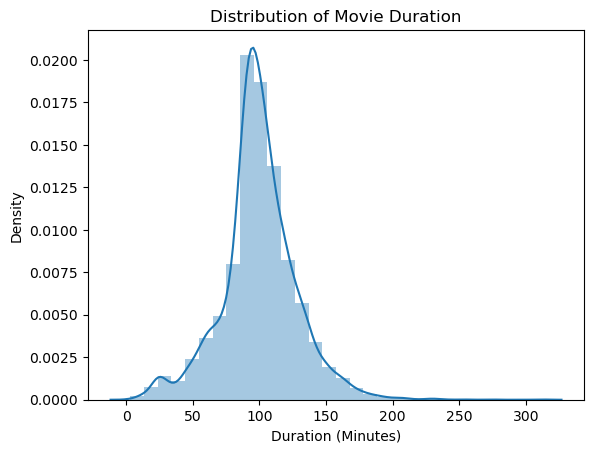

In [170]:
sns.distplot(df_movies['duration_minutes'], bins=30, kde=True)
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (Minutes)')
plt.show()

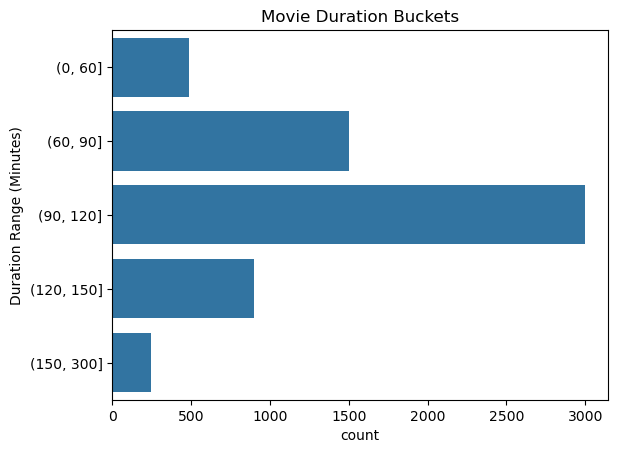

In [171]:
df_movies['duration_bin'] = pd.cut(
    df_movies['duration_minutes'],
    bins=[0,60,90,120,150,300]
)

sns.countplot(y='duration_bin', data=df_movies)
plt.title('Movie Duration Buckets')
plt.ylabel('Duration Range (Minutes)')
plt.show()

In [181]:
# df_tv = netflix_data[netflix_data['type'] == 'TV Show'].copy()
# #df_tv['seasons'] = df_tv['duration'].str.replace(' Seasons?', '', regex=True).astype(int)
# df_tv['season'] = (
#     df_tv['duration']
#     .str.replace(' min', '', regex=False)
#     .pipe(pd.to_numeric, errors='coerce')
# )
# df_tv
df_tv = netflix_data[netflix_data['type'] == 'TV Show'].copy()

df_tv['seasons'] = (
    df_tv['duration']
    .str.replace(' Seasons?', '', regex=True)
    .astype(float)
)
df_tv

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,seasons
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not available,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0
3,s4,TV Show,Jailbirds New Orleans,unknown,Not available,Not available,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Not available,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,unknown,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2018-05-01,2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,2.0
8796,s8797,TV Show,Yunus Emre,unknown,"GÃ¶khan Atalay, Payidar TÃ¼fekÃ§ioglu, Baran A...",Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",2.0
8797,s8798,TV Show,Zak Storm,unknown,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,3.0
8800,s8801,TV Show,Zindagi Gulzar Hai,unknown,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",1.0


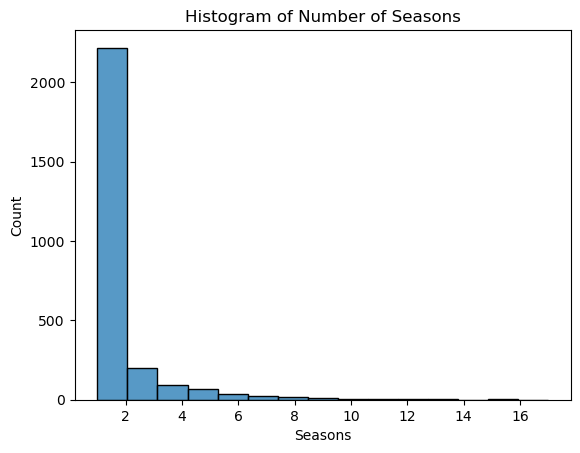

In [182]:
sns.histplot(df_tv['seasons'], bins=15)
plt.title('Histogram of Number of Seasons')
plt.xlabel('Seasons')
plt.show()

C:\Users\shahn\AppData\Local\Temp\ipykernel_18844\3140422338.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_tv['seasons'], bins=15, kde=True)


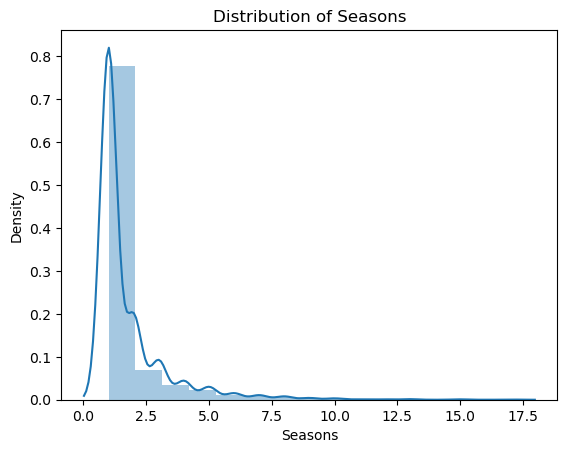

In [183]:
sns.distplot(df_tv['seasons'], bins=15, kde=True)
plt.title('Distribution of Seasons')
plt.xlabel('Seasons')
plt.show()

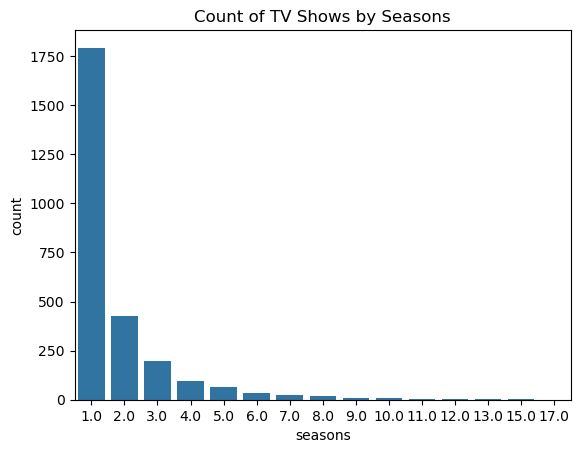

In [184]:
sns.countplot(x='seasons', data=df_tv)
plt.title('Count of TV Shows by Seasons')
plt.show()

For categorical variable(s): Boxplot (10 Points)

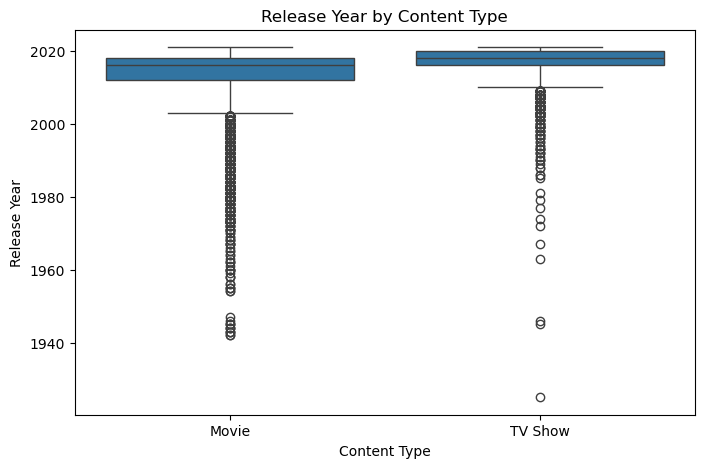

In [186]:
plt.figure(figsize=(8,5))
sns.boxplot(data=netflix_data, x='type', y='release_year')
plt.title('Release Year by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Release Year')
plt.show()

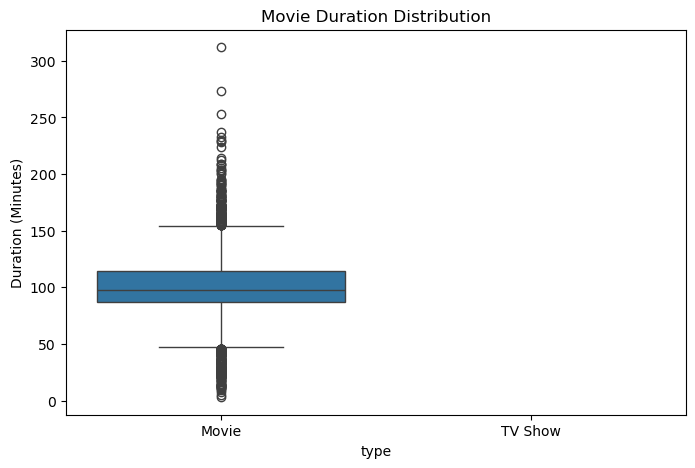

In [188]:
df_movies = netflix_data[netflix_data['type'] == 'Movie'].copy()
df_movies['duration_minutes'] = (
    df_movies['duration']
    .str.replace(' min', '', regex=False)
    .pipe(pd.to_numeric, errors='coerce')
)

plt.figure(figsize=(8,5))
sns.boxplot(data=df_movies, x='type', y='duration_minutes')
plt.title('Movie Duration Distribution')
plt.ylabel('Duration (Minutes)')
plt.show()

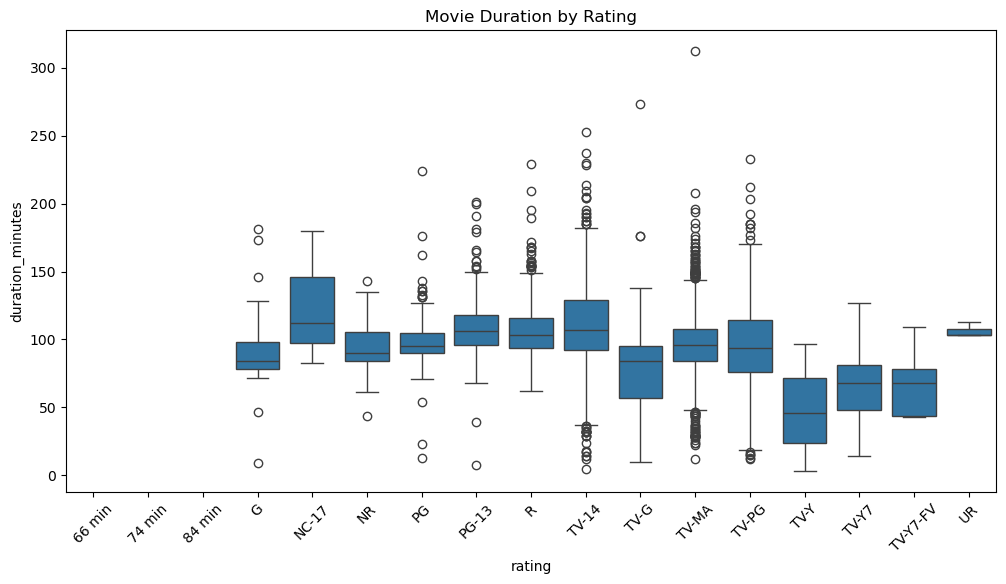

In [189]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_movies, x='rating', y='duration_minutes')
plt.title('Movie Duration by Rating')
plt.xticks(rotation=45)
plt.show()

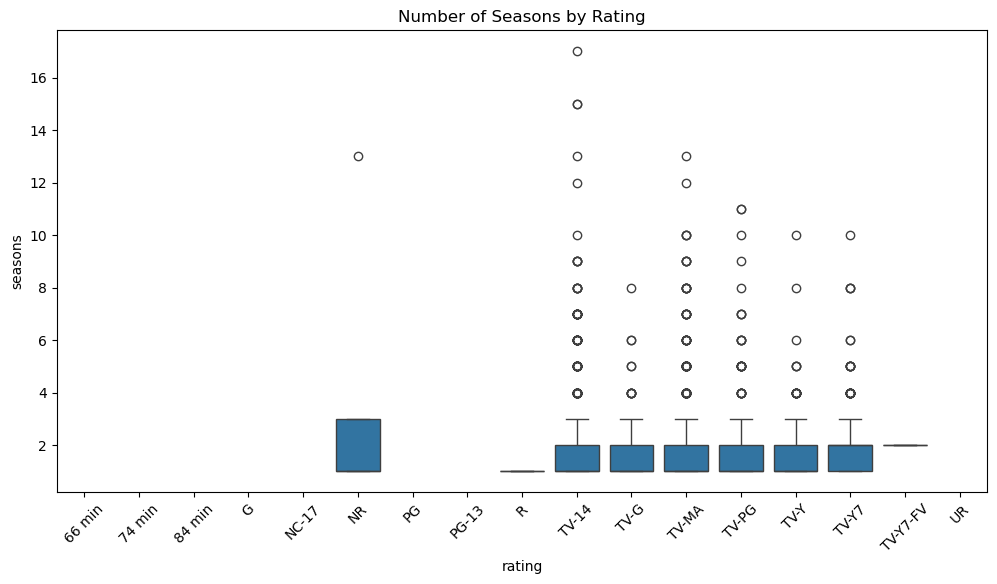

In [191]:
df_tv = netflix_data[netflix_data['type'] == 'TV Show'].copy()
df_tv['seasons'] = df_tv['duration'].str.replace(' Seasons?', '', regex=True).astype(int)

plt.figure(figsize=(12,6))
sns.boxplot(data=df_tv, x='rating', y='seasons')
plt.title('Number of Seasons by Rating')
plt.xticks(rotation=45)
plt.show()

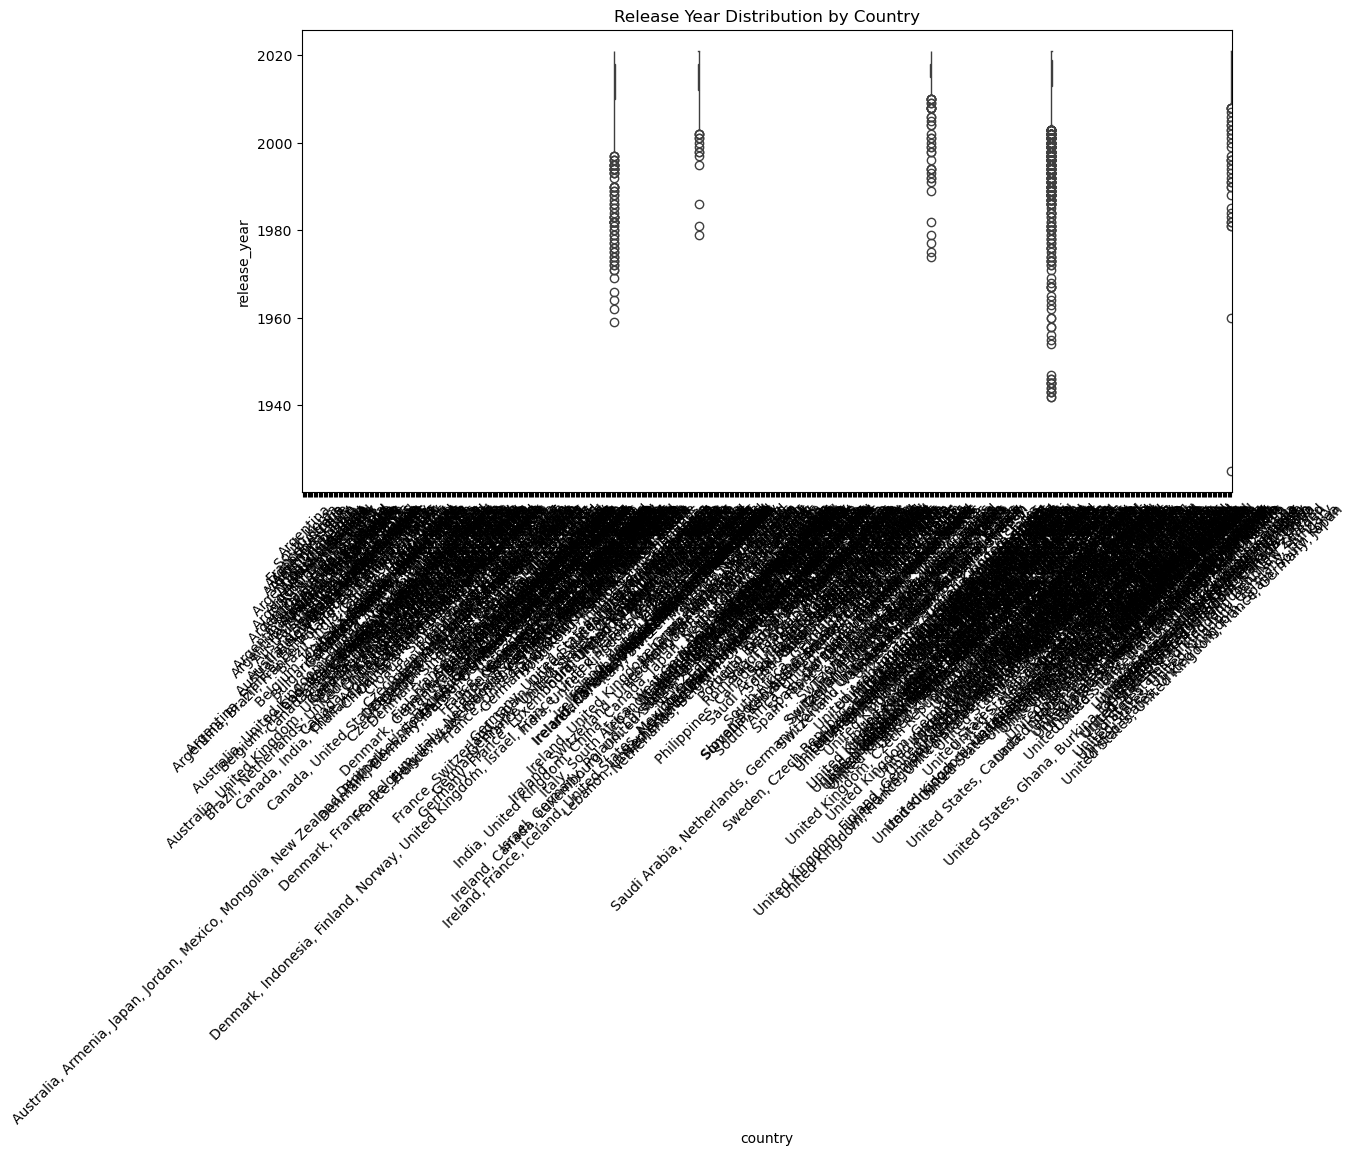

In [192]:
top_countries = netflix_data['country'].value_counts().head(5).index
df_country = netflix_data[netflix_data['country'].isin(top_countries)]

plt.figure(figsize=(12,6))
sns.boxplot(data=df_country, x='country', y='release_year')
plt.title('Release Year Distribution by Country')
plt.xticks(rotation=45)
plt.show()

Outlier Detection

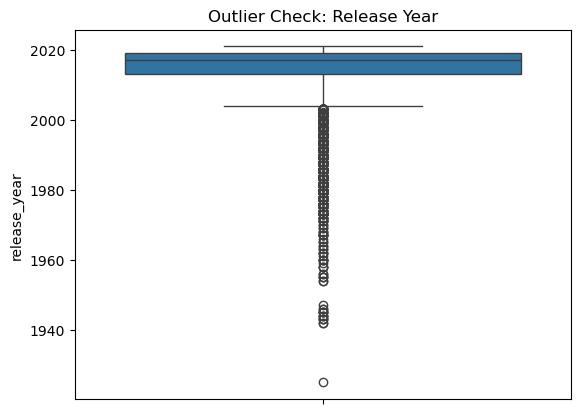

In [193]:
sns.boxplot(y=netflix_data['release_year'])
plt.title('Outlier Check: Release Year')
plt.show()

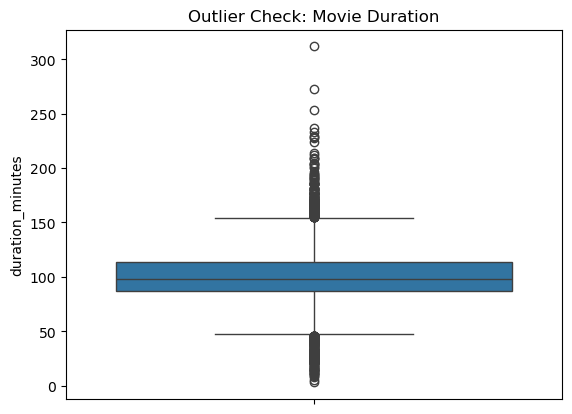

In [194]:
sns.boxplot(y=df_movies['duration_minutes'])
plt.title('Outlier Check: Movie Duration')
plt.show()

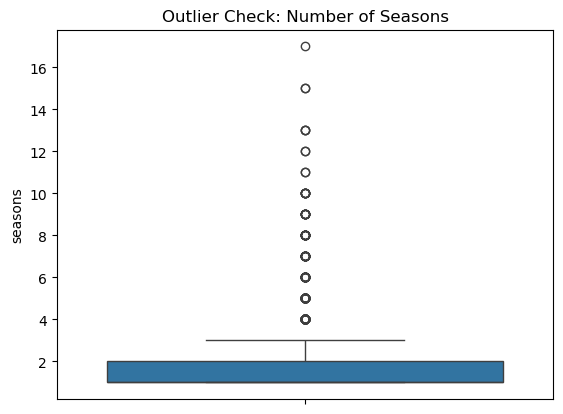

In [195]:
sns.boxplot(y=df_tv['seasons'])
plt.title('Outlier Check: Number of Seasons')
plt.show()

In [196]:
Q1 = df_movies['duration_minutes'].quantile(0.25)
Q3 = df_movies['duration_minutes'].quantile(0.75)
IQR = Q3 - Q1

outliers = df_movies[
    (df_movies['duration_minutes'] < Q1 - 1.5 * IQR) |
    (df_movies['duration_minutes'] > Q3 + 1.5 * IQR)
]

outliers.shape

(450, 13)

6. Insights Based on Non-Graphical and Visual Analysis
6.1 Comments on the Range of Attributes

Release Year

Ranges from early 1900s to recent years (post-2020).

Majority of titles fall between 2015–2022, showing focus on recent content.

Movie Duration (Minutes)

Typical range: 60–180 minutes.

Extreme values (>200 minutes) exist but are limited.

Number of Seasons (TV Shows)

Range starts from 1 season up to high double digits.

Majority of shows have 1–2 seasons.

Ratings

Discrete, limited categories (TV-MA, TV-14, PG-13, etc.).

Clearly segmented by audience maturity.

Genres (listed_in)

Multiple genre combinations per title.

Dominated by Drama, International, and Comedy categories.

Countries

Multiple countries per title.

Content spans a wide global range, but skewed toward a few regions.

6.2 Comments on Distribution of Variables and Relationships

Distribution Characteristics

Release year and duration show right-skewed distributions.

TV show seasons are heavily left-skewed (short series dominate).

Relationship Between Variables

Content type strongly influences:

Duration (Movies vs TV Shows)

Rating distribution

Genre and rating show a strong dependency, indicating deliberate targeting.

Country vs Content Strategy

US produces both Movies and TV Shows extensively.

India contributes more Movies than TV Shows.

UK has a stronger share in TV Shows.

Time-Based Growth

Content addition increased sharply after 2015.

TV Shows grew steadily; Movies expanded rapidly.

6.3 Comments for Each Univariate and Bivariate Plot
🔹 Univariate Analysis Insights

Content Type Count Plot

Movies dominate the catalog.

TV Shows are fewer but strategically important.

Rating Distribution Plot

Majority of content targets teen and adult audiences.

Limited family/kids content.

Release Year Histogram

Strong spike after 2015.

Confirms focus on modern content.

Genre Bar Plot

Drama and International content lead.

Documentaries represent a growing niche.

Movie Duration Distribution

Most movies fall between 90–120 minutes.

Indicates standardized runtime strategy.

TV Show Seasons Distribution

Most shows have 1–2 seasons.

Suggests experimentation before long-term renewal.

🔹 Bivariate Analysis Insights

Content Type vs Rating

TV Shows skew toward TV-MA and TV-14.

Movies span a wider range of ratings.

Content Type vs Release Year

TV Shows are generally more recent than Movies.

Reflects Netflix’s investment in original series.

Country vs Content Type

Regional content strategies vary significantly.

Localization is a key growth driver.

Genre vs Rating Heatmap / Boxplot

Mature ratings dominate Drama and Documentaries.

Kids genres align with lower ratings.

Q1. Defining Problem Statement and Analysing basic metrics
Business Context
Netflix operates in multiple countries and invests heavily in content creation and acquisition. To grow subscribers and optimize content spending, Netflix needs to understand what type of content performs best across regions and time.
Problem Statement
Using the Netflix dataset, analyse the content library to identify patterns in content type, geography, release trends, and ratings. The goal is to generate data-driven insights that help decide which types of shows or movies Netflix should prioritize to grow its global business.
Key Business Questions
1.	What type of content (Movies vs TV Shows) dominates the platform?
2.	How is content distributed across different countries?
3.	How has Netflix’s content addition changed over time?
4.	Which genres and ratings are most common?
5.	What insights can guide future content strategy?
Content Type Distribution
Metric
•	Count of Movies vs TV Shows
Insight
•	Movies usually make up ~65–70% of the catalogue.
•	TV Shows are fewer in number but often drive long-term user engagement.
Business Meaning
•	Movies help attract users quickly.
•	TV shows help retain subscribers over time.
Country-wise Content Availability
Metric
•	Number of titles produced per country
Typical Findings
•	United States dominates content production.
•	India, UK, Canada, Japan are fast-growing contributors.
Business Meaning
•	Netflix is increasingly investing in regional and local-language content.
•	High-growth countries represent strong opportunities for localized shows.
Content Growth Over Time
Metric
•	Titles added per year (using date_added or release_year)
Typical Trend
•	Sharp increase in content after 2016.
•	Slower growth in recent years, indicating focus on quality over quantity.
Business Meaning
•	Netflix shifted from library expansion to strategic content investment.

Genre Analysis
Metric
•	Frequency of genres from listed_in
Most Common Genres
•	Dramas
•	International Movies
•	Comedies
•	Documentaries
Business Meaning
•	Dramas and international content appeal to a broad global audience.
•	Documentaries are cost-effective with strong niche engagement.




7.	Business Insights


1️⃣ Movie-Dominant Content Library
Pattern Observed:
Movies significantly outnumber TV Shows in the catalog.
Inference:
Movies are used to attract a broad audience quickly, while TV Shows are fewer but likely focused on retention.
________________________________________
2️⃣ Strong Focus on Mature & Teen Audiences
Pattern Observed:
TV-MA and TV-14 ratings dominate the dataset.
Inference:
Netflix primarily targets teen and adult viewers, suggesting higher engagement and monetization potential from these segments.
________________________________________
3️⃣ Rapid Content Expansion After 2015
Pattern Observed:
Sharp increase in titles released after 2015.
Inference:
Netflix accelerated original and licensed content to support global expansion and subscriber growth.
________________________________________
4️⃣ Preference for Standard Movie Durations
Pattern Observed:
Most movies fall between 90–120 minutes.
Inference:
Standardized runtimes improve viewer completion rates and reduce production risk.
________________________________________
5️⃣ Short-Season TV Show Strategy
Pattern Observed:
Majority of TV Shows have 1–2 seasons.
Inference:
Netflix follows a test-and-scale approach, renewing only high-performing shows.
________________________________________
6️⃣ Drama as the Core Genre
Pattern Observed:
Drama consistently appears as the most frequent genre.
Inference:
Drama provides high engagement and cross-cultural appeal, making it a safe investment globally.
________________________________________
7️⃣ Growing Importance of International Content
Pattern Observed:
Significant contributions from India, UK, and other non-US countries.
Inference:
Localized content is critical for regional market penetration and subscriber growth.
________________________________________
8️⃣ Genre and Rating Are Strongly Linked
Pattern Observed:
Dramas and Documentaries skew toward mature ratings; kids genres toward lower ratings.
Inference:
Netflix deliberately aligns genre selection with target age groups to improve recommendation accuracy.
________________________________________
9️⃣ TV Shows Are More Recent Than Movies
Pattern Observed:
Median release year for TV Shows is higher than Movies.
Inference:
Netflix invests more aggressively in original series to drive long-term engagement.
________________________________________
🔟 Outliers Represent Strategic Content, Not Errors
Pattern Observed:
Very long movies and multi-season TV Shows exist as outliers.
Inference:
These represent premium or flagship content, which should be retained as they add brand value.



8. Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

1️⃣ Increase Investment in High-Quality TV Series
TV Shows help retain subscribers longer.
👉 Focus on creating strong multi-season original series.
________________________________________
2️⃣ Expand Family and Kids Content
Most content targets adults and teens.
👉 Add more kids and family-friendly shows to attract complete households.
________________________________________
3️⃣ Continue Producing Strong Drama Content
Drama is the most popular genre.
👉 Invest consistently in drama across different languages and regions.
________________________________________
4️⃣ Strengthen International Content Production
International titles are growing and important.
👉 Increase local-language content in India, Europe, and emerging markets.
________________________________________
5️⃣ Maintain Standard Movie Length Strategy
Most successful movies are 90–120 minutes.
👉 Keep movie duration audience-friendly to improve completion rates.
________________________________________
6️⃣ Adopt a “Test and Scale” Approach for TV Shows
Most shows have 1–2 seasons.
👉 Launch new series with limited seasons and extend only high-performing ones.
________________________________________
7️⃣ Promote Recent Content More Aggressively
Viewers prefer newer titles.
👉 Highlight newly released content prominently on the homepage.
________________________________________
8️⃣ Use Genre-Based Targeted Promotions
Different genres attract different age groups.
👉 Run targeted marketing campaigns for drama, documentaries, and kids content separately.
________________________________________
9️⃣ Develop More Long-Running Flagship Shows
A few long-season shows build brand loyalty.
👉 Identify successful series and invest in turning them into long-term franchises.
________________________________________
🔟 Improve Content Metadata Accuracy
Some content has missing information (director, cast, etc.).
👉 Ensure complete metadata to improve recommendations and user discovery.

